## Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.offline as pyo

In [3]:
import streamlit as st
import numpy as np
from modele_mat import *
import random
import plotly.express as px
import plotly.graph_objects as go
from fonction_parametrage import *

## Définition des variables

### 1- Importation et nettoyage des fichiers

In [155]:
100*0.04*5*np.log(4e6/(5*100))

179.74393641323945

In [154]:
0.1*0.15*40*2*0.7

0.84

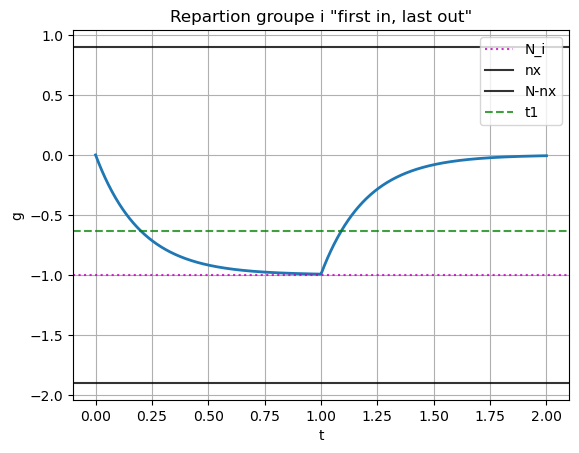

In [181]:
import numpy as np
import matplotlib.pyplot as plt

def cycle_de_vie(t, tau_glob, a, b, K_1, K_2):
    tau_1 = a * tau_glob
    tau_2 = b * tau_glob
    
    if t < 0:
        return 0
    elif 0 <= t < tau_glob:
        return (K_1 - K_2) * np.exp(-t / (tau_1+0.00001)) + K_2
    else:
        return ((K_1 - K_2) * np.exp(-tau_glob / (tau_1 + 0.0001)) + K_2) * np.exp(-(t - tau_glob) / (tau_2+0.0001))

# Définir les paramètres
tau_glob = 1.0
K_1 = 0
K_2 = -1
a = 0.2
b = 0.2
nx=0.9

import numpy as np
from scipy.optimize import bisect

# Définir la fonction que nous voulons résoudre
def equation_1(t):
    return cycle_de_vie(t, tau_glob, a, b, K_1, K_2) - nx

def equation_2(t):
    return cycle_de_vie(t, tau_glob, a, b, K_1, K_2) - (K_2-nx)


try:
    # Résoudre la première équation pour 0 <= t < tau_glob
    t_solution_1 = bisect(equation_1, 0, tau_glob, xtol=0.05, maxiter=50)
except (ValueError, RuntimeError):
    t_solution_1 = False

try:
    # Résoudre la deuxième équation pour tau_glob <= t < tau_glob*(1+b)
    t_solution_2 = bisect(equation_2, tau_glob, tau_glob * (1 + 5*b))
except (ValueError, RuntimeError):
    t_solution_2 = False

# Créer un tableau de valeurs t
t = np.linspace(0, 2 * tau_glob, 1000)

# Calculer la fonction en fonction de t
y = np.vectorize(cycle_de_vie)(t, tau_glob, a, b, K_1, K_2)

# Tracer la fonction avec une ligne plus épaisse
plt.plot(t, y, linewidth=2.0)

plt.xlabel('t')
plt.ylabel('g')
plt.title('Repartion groupe i "first in, last out"')

# Ajouter des lignes en pointillé plus transparentes pour tau_1, K_1, tau_2, K_2
# plt.axvline(x=3*a * tau_glob, color='r', linestyle=':', label=f'tau_1', alpha=0.8)
# plt.axvline(x=tau_glob, color='g', linestyle=':', label=f'tau_global', alpha=0.8)
# plt.axvline(x=3*b*tau_glob + tau_glob , color='c', linestyle=':', label=f'tau_2', alpha=0.8)
#plt.axhline(y=K_1, color='b', linestyle='--', label=f'K_1 = {K_1}', alpha=0.5)
plt.axhline(y=K_2, color='m', linestyle=':', label=f'N_i', alpha=0.8)
plt.axhline(y=nx, color='k', linestyle='-', label=f'nx', alpha=0.8)
plt.axhline(y=K_2-nx, color='k', linestyle='-', label=f'N-nx', alpha=0.8)
plt.axhline(y=cycle_de_vie(0.4-0.2, tau_glob, a, b, K_1, K_2), color='g', linestyle='--', label=f't1', alpha=0.75)
#plt.axhline(y=K_2 - 0.3, color='k', linestyle='-', label=f'N_i - nx', alpha=0.8)
if t_solution_1 != False:
    plt.axvline(x=t_solution_1, color='g', linestyle='--', label=f't1', alpha=0.75)
if t_solution_2 != False:
    plt.axvline(x=t_solution_2, color='r', linestyle='--', label=f't2', alpha=0.75)

plt.legend()
plt.grid(True)
plt.show()


In [177]:
cycle_de_vie(0.4-0.2, 0, -1, 1, 0.1, 0.1)

0.0

In [67]:

a = t_solution_1 < t and t < t_solution_2  and t_solution_1 !=False and t_solution_2 !=False:




SyntaxError: invalid syntax (994350085.py, line 1)

In [68]:
a = t_solution_1 < t < t_solution_2 and t_solution_1 is not False and t_solution_2 is not False


In [69]:
a

False

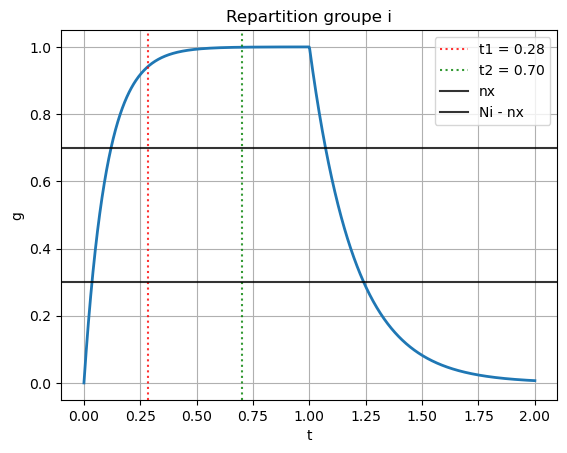

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def cycle_de_vie(t, tau_glob, a, b, K_1, K_2):
    tau_1 = a * tau_glob
    tau_2 = b * tau_glob
    
    if t < 0:
        return 0
    elif 0 <= t < tau_glob:
        return (K_1 - K_2) * np.exp(-t / tau_1) + K_2
    else:
        return ((K_1 - K_2) * np.exp(-tau_glob / tau_1) + K_2) * np.exp(-(t - tau_glob) / tau_2)

# Définir les paramètres
tau_glob = 1.0
K_1 = 0
K_2 = 1
a = 0.1
b = 0.2

# Créer un tableau de valeurs t
t = np.linspace(0, 2 * tau_glob, 1000)

# Calculer la fonction en fonction de t
y = np.vectorize(cycle_de_vie)(t, tau_glob, a, b, K_1, K_2)

# Tracer la fonction avec une ligne plus épaisse
plt.plot(t, y, linewidth=2.0)

plt.xlabel('t')
plt.ylabel('g')
plt.title('Repartition groupe i')

# Fonctions pour résoudre les équations numériquement
def equation1(t1):
    return K_2 * t1 - t1 * (K_1 - K_2) * np.exp(-t1 / (a * tau_glob)) - 0.3

def equation2(t2):
    return K_2 * t2 - t2 * (K_1 - K_2) * np.exp(-tau_glob / (a * tau_glob)) * np.exp(-(t2 - tau_glob) / (b * tau_glob)) - (K_2 - 0.3)

# Trouver les valeurs de t1 et t2 numériquement
t1_value = fsolve(equation1, 0.1)[0]
t2_value = fsolve(equation2, 1.0)[0]

# Tracer les lignes en pointillé pour t1 et t2
plt.axvline(x=t1_value, color='r', linestyle=':', label=f't1 = {t1_value:.2f}', alpha=0.8)
plt.axvline(x=t2_value, color='g', linestyle=':', label=f't2 = {t2_value:.2f}', alpha=0.8)

# Tracer les lignes y = nx et y = Ni - nx
plt.axhline(y=0.3, color='k', linestyle='-', label=f'nx', alpha=0.8)
plt.axhline(y=K_2 - 0.3, color='k', linestyle='-', label=f'Ni - nx', alpha=0.8)

plt.legend()
plt.grid(True)
plt.show()


In [52]:
def indice_max_inferieur(n, L):
    gauche, droite = 0, len(L) - 1
    indice = None
    while gauche <= droite:
        milieu = (gauche + droite) // 2

        if L[milieu] < n:
            indice = milieu
            gauche = milieu + 1
        else:
            droite = milieu - 1

    return indice

indice_max_inferieur(1,[18., 33.])


In [99]:
from scipy.optimize import fsolve
import numpy as np

# Fonction de cycle de vie avec croissance, maturité et déclin (exponentielle du 1er ordre)
def cycle_de_vie(t, temps_de_croissance, valeur_maturite, temps_de_maturite, temps_de_declin):
    if t < temps_de_croissance:
        return (valeur_maturite / temps_de_croissance) * t
    elif temps_de_croissance <= t < temps_de_maturite:
        return valeur_maturite
    elif temps_de_maturite <= t < temps_de_declin:
        return valeur_maturite * np.exp(-2*5*(t - temps_de_maturite) / (temps_de_maturite - temps_de_croissance))
    else:
        return 0.0

# Trouver les deux solutions pour chaque valeur de n
def trouver_deux_solutions(temps_de_croissance, valeur_maturite, temps_de_maturite, temps_de_declin):
    solutions = []

    for n in range(valeur_maturite + 1):
        def equation_a_resoudre(t):
            return cycle_de_vie(t, temps_de_croissance, valeur_maturite, temps_de_maturite, temps_de_declin) - n

        # Trouver les deux solutions en utilisant une recherche binaire
        t1 = fsolve(equation_a_resoudre, x0=0, maxfev=15)
        t2 = fsolve(equation_a_resoudre, x0=temps_de_maturite, maxfev=15)

        solutions.append((n, t1[0], t2[0]))

    return solutions

# Exemple d'utilisation avec des paramètres personnalisés
temps_de_croissance = 20
valeur_maturite = 50
temps_de_maturite = 40
temps_de_declin = 60

solutions = trouver_deux_solutions(temps_de_croissance, valeur_maturite, temps_de_maturite, temps_de_declin)

# Afficher les solutions
for n, t1, t2 in solutions:
    print(f"Pour n = {n}, les deux solutions sont t1 = {t1}, t2 = {t2}")


Pour n = 0, les deux solutions sont t1 = 0.0, t2 = 58.47683156962069
Pour n = 1, les deux solutions sont t1 = 0.4, t2 = 47.82404601085629
Pour n = 2, les deux solutions sont t1 = 0.8, t2 = 46.4377516497364
Pour n = 3, les deux solutions sont t1 = 1.2, t2 = 45.6268214335199
Pour n = 4, les deux solutions sont t1 = 1.6, t2 = 45.05145728861651
Pour n = 5, les deux solutions sont t1 = 2.0, t2 = 44.60517018598399
Pour n = 6, les deux solutions sont t1 = 2.4, t2 = 44.240527072400106
Pour n = 7, les deux solutions sont t1 = 2.8, t2 = 43.93222571274566
Pour n = 8, les deux solutions sont t1 = 3.2, t2 = 43.66516292749662
Pour n = 9, les deux solutions sont t1 = 3.6, t2 = 43.4295968561728
Pour n = 10, les deux solutions sont t1 = 4.0, t2 = 43.21887582486709
Pour n = 11, les deux solutions sont t1 = 4.3999999999999995, t2 = 43.02825546525944
Pour n = 12, les deux solutions sont t1 = 4.8, t2 = 42.85423271128028
Pour n = 13, les deux solutions sont t1 = 5.2, t2 = 42.69414729593322
Pour n = 14, les 

c:\Users\bilel\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning:

The number of calls to function has reached maxfev = 15.



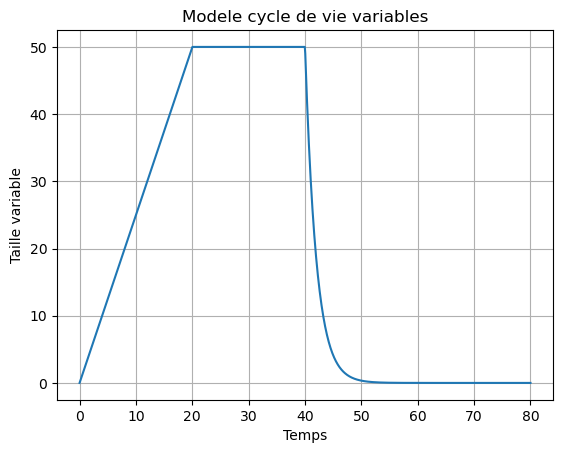

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
temps_de_croissance = 20  # Temps de croissance
valeur_maturite = 50   # Valeur à maturité
temps_de_maturite = 40   # Temps de maturité
temps_de_declin = 60     # Temps de déclin
temps_de_vie = 80        # Durée de vie de l'organisme

# Temps
t = np.linspace(0, temps_de_vie, 1000)

# Modélisation du cycle de vie
S = np.piecewise(t, [t < temps_de_croissance, (t >= temps_de_croissance) & (t < temps_de_maturite), t >= temps_de_maturite],
                 [lambda t: (valeur_maturite / temps_de_croissance) * t,
                  lambda t: valeur_maturite,
                  lambda t: valeur_maturite * np.exp(- 2*5*(t - temps_de_maturite) / (temps_de_maturite - temps_de_croissance))])

# Tracer la courbe de cycle de vie
plt.plot(t, S)
plt.xlabel('Temps')
plt.ylabel('Taille variable')
plt.title('Modele cycle de vie variables')
plt.grid(True)
plt.show()


In [14]:
file_wb = './values_true.xlsx'
df_wb = pd.read_excel(file_wb)

df_wb.to_csv('values_complet.csv', index=False)



In [11]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

In [9]:
#traitement des variables à coef négatifs:
slice = df_wb['Valeurs'] < 0
df_wb.loc[slice, 'Variables'] = 'No_' + df_wb['Variables']
df_wb.loc[slice, 'Valeurs'] = df_wb['Valeurs'].abs()

KeyError: 'Valeurs'

### 2- Définition des variables globales

In [ ]:
delta = 0.015 #taux d'actualisation

Trans = -np.array([50 for i in range(14)]) #Etat des variables transversales considérées

horizon = 60 # Période de temps considérée

# Dictionnaire des delta_A: pour chacun des groupes, on a les variations correspondantes
dic_A_n_inf = {}
dic_A_n_inf[1] = [('Housing_quality', 0.6), ('No_Sleep_problems', 0.6), ('Physical_attractiveness', -0.4), ('Self-efficacy', 0.3), ('taille', 5000)]
dic_A_n_inf[2] = [('Housing_quality', 0.6), ('No_Sleep_problems', -0.3), ('Physical_attractiveness', -0.4), ('Self-efficacy', 0.3), ('taille', 2000)]
dic_A_n_inf[3] = [('Housing_quality', 0.4), ('No_Sleep_problems', 0.6), ('Physical_attractiveness', 0.7), ('Self-efficacy', -0.3), ('taille', 4000)]
dic_A_n_inf[4] = [('Housing_quality', 0.2), ('No_Sleep_problems', 0.6), ('Physical_attractiveness', -0.4), ('Self-efficacy', 0.3), ('taille', 1000)]

dic_A_n = [dic_A_n_inf for t in range(horizon)] #Listes de dictionnaires des delta_A pour chaque instant


nb_gp = len(list(dic_A_n_inf.keys())) #nombre de groupes

In [222]:
# Création d'un dictionnaire variable : beta_variable
df_to_dic = df_wb.set_index('Variables')
dic_wb = df_to_dic['Valeurs'].to_dict()

## Définiton des modèles transversaux

### 1- Définition du modèle de kt

In [8]:
# Fonction de régression de k_t
def K_t(X):
    df = df_ts.copy()
    df['input'] = X
    return sum(df['input']*df['Coef reg kt non normalisé'])

In [9]:
w_t = K_t(np.array([100 for i in range(14)])) # worst case

In [10]:
#Modèle logarithmique, faible concavité
def kt_1(X):
    arg_1 = (np.exp(1)-1)/w_t
    arg_2 = np.exp(1)
    return np.log(arg_1*K_t(X)+arg_2)


In [11]:
#Modèle exponentielle décroissante, concavité plus forte
def kt_2(X):
    arg = -3*(K_t(X)+w_t)/(w_t)
    return 1 - np.exp(arg)


### 2- Définiton du modèle de p_s:

In [87]:
alpha_ps = 0.004 #paramètre pour régler la référence sur p_s

In [88]:
# Fonction de régression de p_s

def K_s(X):
    df = df_ts.copy()
    df['input'] = X
    return alpha_ps*sum(df['input']*df['Coef reg ps non normalisé'])

In [14]:
w_s = K_s(np.array([100 for i in range(14)])) # worst case

In [92]:
#Regression logistique asymétrique

def p_s(X, beta=0.05):
    arg = np.exp(-K_s(X))
    return 1/(1+beta*arg)

## Calcul de l'impact

In [215]:
def calcul_impact(dic_A_n, Trans, horizon):
    I = 0
    k = kt_2(Trans)
    p = p_s(Trans)
    dic_I = {}
    for t in range(horizon):
        fac = (1/(1+delta))**(t/12)                 #facteur d'actualisation
        wb = 0
        n_tot = 0                                      #wb à l'instant t sommé sur tous les couples (groupe, variable)
        for gp, X in dic_A_n[t].items():
            wb_gp = 0
            n = X[-1][1]
            for var_val in X[:-1]:
                var = var_val[0]
                A = var_val[1]
                if A > 0:                               #Delta positifs ou négatifs
                    X = k * p * A  
                else:
                    X = (2 - k) * p * A
                wb_var = dic_wb[var] * X
                wb_gp += wb_var
            n_tot += n
            dic_I[(gp,t)] = (wb_gp*fac, n_tot)
            wb += wb_gp*n
        wb_somme_temp = fac * wb
        I += wb_somme_temp
    return I, dic_I

In [216]:
def plus_proche_valeur(n,L):
    ind = 0
    if n>L[-1][1]:
        return len(L),0
    while n>L[ind][1]:
        ind+=1
    return ind, L[ind][0]

In [217]:
def fonction_impact_inf(dic_A_n, Trans, horizon, n, t):
    dic_I = calcul_impact(dic_A_n, Trans, horizon)[1]
    sub_dic = {groupe: valeur for (groupe, temps), valeur in dic_I.items() if temps == t}
    L = list(sub_dic.values())
    return plus_proche_valeur(n,L)[1]
    

0.0006062972419572584

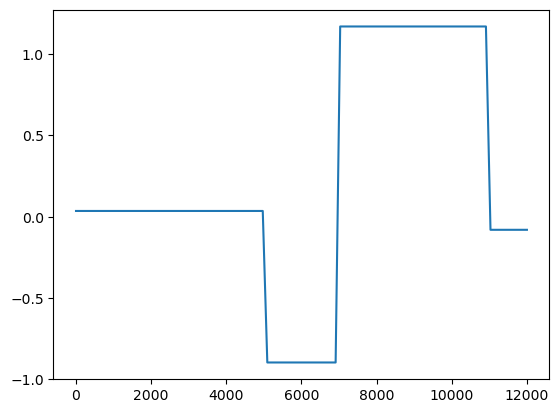

In [218]:
def fonction_impact_gp(n):
    T = np.linspace(0,horizon -1,horizon, dtype=int)
    return sum([fonction_impact_inf(dic_A_n, Trans, horizon, n, t) for t in T])


imp_gp_vect = np.vectorize(fonction_impact_gp)
n = np.linspace(0, 12000, 100)
I = imp_gp_vect(n)
plt.plot(n,I)
plt.show()

In [219]:
dic_I = calcul_impact(dic_A_n, Trans, horizon)[1]
sub_dic = {groupe: valeur for (groupe, temps), valeur in dic_I.items() if temps == 2}
fonction_impact(dic_A_n, Trans, horizon, 6000, 2)

def imp(n,t):
    return fonction_impact_inf(dic_A_n, Trans, horizon, n, t)
imp_vectorized = np.vectorize(imp)
n = np.linspace(0, 12000, 100)
t = np.linspace(0,horizon -1,horizon, dtype=int)
N, T = np.meshgrid(n, t)
I = imp_vectorized(N,T)

#I = [fonction_impact(dic_A_n, Trans, horizon, x, y) for (x,y) in zip(N,T) ]

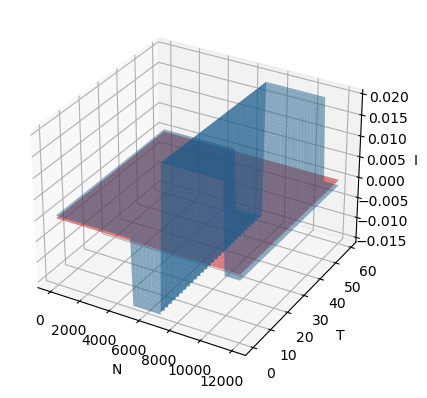

In [220]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(N, T, I, alpha = 0.5, label='distribution du well-being')
ax.plot_surface(N, T, np.zeros_like(I), alpha=0.5, color='red', label='I=0')
# Ajouter des étiquettes aux axes
ax.set_xlabel('N')
ax.set_ylabel('T')
ax.set_zlabel('I')
# Afficher le plot
plt.show()

## Calcul des ressources

In [ ]:
def dynamique_CO2(delta_A):

In [ ]:
#On suppose que les coûts ont déjà été sommés sur la période étudiée
def calcul_impact_ressources(A_s, A_e, Trans):
    beta = np.array([dic_wb['Assessment_financial_situation'], dic_wb['Climatic']])
    ps = p_s(Trans)
    kt = kt_1(Trans)
    wb_s = sum(beta*A_s)
    wb_e = sum(beta*A_e)
    return (2-kt)*(ps*wb_s+(1-ps*wb_e))

In [116]:
input_A = {1: [('No_Criminality/Insecurity', 0.0, 0.11821300097273985, 0.0), ('No_Discrimination', 0.0, 0.20106214708667558, 0.0), ('Social coherence (cohésion sociale)', 0.0, 0.4672972181712553, 0.0), ('Traditionalism', 0.0, 0.3339518651515811, 0.0), ('Years in state', 0.0, 0.0389538031111904, 0.0), ('Academic education', 0.0, -0.04036024820611531, 0.0), ('Family education', 0.0, 0.2931877238109344, 0.0), ('Access to local services', 0.0, -0.12211513958776649, 0.0), ('Air and water pollution', 0.0, 0.5948654580638415, 0.0), ('Close to green spaces', 0.0, -0.19957493518657046, 0.0), ('Housing quality', 0.0, 0.08842145064284096, 0.0), ('No_No accès to health services', 0.0, 0.09222836573638027, 0.0), ('No_No access to food', 0.0, -0.02754527956656122, 0.0), ('No_No access to water', 0.0, 0.010134163134456836, 0.0), ('Noise pollution', 0.0, -0.13520426155973952, 0.0), ('Richessness fauna, flaura and landscape', 0.0, 0.42270839949754707, 0.0), ('Relative health', 0.0, -0.16674315381808294, 0.0), ('Relative salary', 0.0, 0.42538195511911664, 0.0), ('Family support', 0.0, 0.2323947511575578, 0.0), ('No_Famlily strain', 0.0, 0.20737316322502802, 0.0), ('Friends support', 0.0, -0.0468414110230336, 0.0), ('Having grandparents', 0.0, 0.003718777387685279, 0.0), ('Number of children', 0.0, -0.16648397000157253, 0.0), ('Partenaired', 0.0, -0.04184312842611951, 0.0), ('Positive relationships', 0.0, 0.545208441595634, 0.0), ('Pregnancy', 0.0, 0.5939299524015795, 0.0), ('Social Closeness', 0.0, 0.3985984387606312, 0.0), ('Social integration', 0.0, -0.014050047048602021, 0.0), ('No_Tobacco and alcohol of others', 0.0, 0.01580419632316027, 0.0), ('No_Contribution to others', 0.0, -0.10208580280986368, 0.0), ('Emotional management', 0.0, -0.07588956308713746, 0.0), ('Managing impact of past experience', 0.0, 0.44489529250880583, 0.0), ('Positive habits', 0.0, 0.12282335271187467, 0.0), ('Stress management', 0.0, 0.039307640033817315, 0.0), ('Coping active (proactivity)', 0.0, 0.3568197879874168, 0.0), ('Efforts in life', 0.0, 0.50404272824385, 0.0), ('No_Hypervigilence (=somatic amplification)', 0.0, -0.16862748424338367, 0.0), ('Selective secondary control(=commitment)', 0.0, 0.2688727852841491, 0.0), ('Compensatory primary control', 0.0, -0.06310576448487878, 0.0), ('Openness to new experiences', 0.0, -0.06262465811468507, 0.0), ('Evenement mastery', 0.0, -0.18386216147368195, 0.0), ('Goals in life', 0.0, -0.1991693080963306, 0.0), ('Self -control', 0.0, 0.14392721337033132, 0.0), ('Time management and anticipation', 0.0, -0.06854744076640093, 0.0), ('(Need of Security)', 0.0, 0.41712248554043646, 0.0), ('Altruism', 0.0, -0.0580192866630056, 0.0), ('Gratitude', 0.0, 0.5478820696824387, 0.0), ('Honesty', 0.0, 0.22270563099251034, 0.0), ('No_Agreebleness', 0.0, 0.29020977786025803, 0.0), ('Extraversion', 0.0, 0.4080406726090577, 0.0), ('No_Health locus of control', 0.0, 0.2501530695759535, 0.0), ('Optimism', 0.0, 0.31303916715818586, 0.0), ('No_Social potency', 0.0, 0.11326860705717562, 0.0), ('No_Sympathy', 0.0, 0.15888279382556753, 0.0), ('Consciensciousness', 0.0, 0.14296801263855247, 0.0), ('Living the moment', 0.0, 0.10059127999552747, 0.0), ('Physical attractiveness', 0.0, 0.04050390531876591, 0.0), ('Self protection', 0.0, 0.007007807434311092, 0.0), ('Self-efficacy', 0.0, 0.5107080710888023, 0.0), ('No_Alcohol problems', 0.0, 0.4940072603323838, 0.0), ('No_Drug consumption', 0.0, 0.5663738027315399, 0.0), ('Food', 0.0, -0.11964123660579551, 0.0), ('Social networks', 0.0, -0.043040925410127606, 0.0), ('No_Tobacco', 0.0, 0.5956266541195752, 0.0), ('No_Mental health professsionnal', 0.0, -0.1308146651866468, 0.0), ('No_Aches', 0.0, 0.1967828532642112, 0.0), ('Diseases', 0.0, 0.5957334295610004, 0.0), ('No_Sleep problems', 0.0, -0.11525205257382504, 0.0), ('Games', 0.0, -0.12739054208559536, 0.0), ('Intellectual activities', 0.0, 0.024366418384525967, 0.0), ('Physical activity', 0.0, 0.5975922859934084, 0.0), ('Political participation', 0.0, 0.5874875554754053, 0.0), ('Sex life', 0.0, 0.42755957061629685, 0.0), ('Spiritual and religious experiences', 0.0, 0.5149101768701607, 0.0), ('Assessment financial situation', 0.0, 0.587485012215524, 0.0), ('Assessment professionnal life', 0.0, 0.03857367413088078, 0.0), ('Balance btw personal and professional life', 0.0, -0.0026947149409609072, 0.0), ('Control over professionnal life', 0.0, 0.5781844421672655, 0.0), ('Financial situation effort', 0.0, 0.39880513811707813, 0.0), ('taille', 1, 18, 2)], 2: [('No_Criminality/Insecurity', 0.0, -0.3685304887926396, 0.0), ('No_Discrimination', 0.0, -0.14341358754561223, 0.0), ('Social coherence (cohésion sociale)', 0.0, -0.059806526690014905, 0.0), ('Traditionalism', 0.0, -0.16500589019924083, 0.0), ('Years in state', 0.0, -0.42202915485589876, 0.0), ('Academic education', 0.0, 0.09173435650471251, 0.0), ('Family education', 0.0, -0.06259358307807589, 0.0), ('Access to local services', 0.0, -0.2295561708368865, 0.0), ('Air and water pollution', 0.0, -0.15632254949469576, 0.0), ('Close to green spaces', 0.0, -0.20893252674559037, 0.0), ('Housing quality', 0.0, -0.02716139721718397, 0.0), ('No_No accès to health services', 0.0, -0.48388440855564074, 0.0), ('No_No access to food', 0.0, 0.08331595318467633, 0.0), ('No_No access to water', 0.0, -0.08129236327463779, 0.0), ('Noise pollution', 0.0, -0.18663059650654218, 0.0), ('Richessness fauna, flaura and landscape', 0.0, -0.15230838754749776, 0.0), ('Relative health', 0.0, -0.1791143238616531, 0.0), ('Relative salary', 0.0, -0.49349449084433633, 0.0), ('Family support', 0.0, -0.2880352224575183, 0.0), ('No_Famlily strain', 0.0, -0.3065822737639957, 0.0), ('Friends support', 0.0, -0.2531131139887161, 0.0), ('Having grandparents', 0.0, 0.08913371840366735, 0.0), ('Number of children', 0.0, -0.1432239442858267, 0.0), ('Partenaired', 0.0, 0.017279527451381282, 0.0), ('Positive relationships', 0.0, -0.060350483323379445, 0.0), ('Pregnancy', 0.0, -0.13299082256660155, 0.0), ('Social Closeness', 0.0, -0.11706858863934289, 0.0), ('Social integration', 0.0, -0.43459660098295166, 0.0), ('No_Tobacco and alcohol of others', 0.0, -0.4750366399170002, 0.0), ('No_Contribution to others', 0.0, -0.18518315463764995, 0.0), ('Emotional management', 0.0, -0.025059828373680704, 0.0), ('Managing impact of past experience', 0.0, 0.09484790406858723, 0.0), ('Positive habits', 0.0, -0.45297301268124945, 0.0), ('Stress management', 0.0, -0.43843091551310137, 0.0), ('Coping active (proactivity)', 0.0, -0.42334146865472416, 0.0), ('Efforts in life', 0.0, -0.43112758467195794, 0.0), ('No_Hypervigilence (=somatic amplification)', 0.0, -0.3191690095250013, 0.0), ('Selective secondary control(=commitment)', 0.0, -0.37272671379698874, 0.0), ('Compensatory primary control', 0.0, -0.4605762948661469, 0.0), ('Openness to new experiences', 0.0, -0.08100845900693315, 0.0), ('Evenement mastery', 0.0, -0.3575595948731533, 0.0), ('Goals in life', 0.0, -0.10913050841138783, 0.0), ('Self -control', 0.0, -0.12695083282179415, 0.0), ('Time management and anticipation', 0.0, -0.47525551502526686, 0.0), ('(Need of Security)', 0.0, -0.010001779936576694, 0.0), ('Altruism', 0.0, -0.2719617293724119, 0.0), ('Gratitude', 0.0, -0.48794335669921796, 0.0), ('Honesty', 0.0, -0.25666069991895946, 0.0), ('No_Agreebleness', 0.0, -0.1702182496859853, 0.0), ('Extraversion', 0.0, -0.24617419334273072, 0.0), ('No_Health locus of control', 0.0, -0.061642460629220575, 0.0), ('Optimism', 0.0, -0.45562736752365357, 0.0), ('No_Social potency', 0.0, 0.07989508601790474, 0.0), ('No_Sympathy', 0.0, -0.2567356117005073, 0.0), ('Consciensciousness', 0.0, 0.02812775744913054, 0.0), ('Living the moment', 0.0, -0.051306417299973484, 0.0), ('Physical attractiveness', 0.0, -0.29959037619560414, 0.0), ('Self protection', 0.0, 0.09556628873404949, 0.0), ('Self-efficacy', 0.0, -0.3860395968303434, 0.0), ('No_Alcohol problems', 0.0, -0.007548764803372909, 0.0), ('No_Drug consumption', 0.0, -0.14113149856441853, 0.0), ('Food', 0.0, -0.14573690190988448, 0.0), ('Social networks', 0.0, 0.014807905851521475, 0.0), ('No_Tobacco', 0.0, -0.32667890151466394, 0.0), ('No_Mental health professsionnal', 0.0, -0.4730044287408003, 0.0), ('No_Aches', 0.0, -0.19758677804086638, 0.0), ('Diseases', 0.0, -0.3486463412656433, 0.0), ('No_Sleep problems', 0.0, -0.3300593309538691, 0.0), ('Games', 0.0, -0.4159585488557399, 0.0), ('Intellectual activities', 0.0, 0.013316273429543224, 0.0), ('Physical activity', 0.0, -0.17865176835553281, 0.0), ('Political participation', 0.0, -0.3819374159311797, 0.0), ('Sex life', 0.0, 0.09394743617669421, 0.0), ('Spiritual and religious experiences', 0.0, -0.26635616769441883, 0.0), ('Assessment financial situation', 0.0, 0.024464135917892316, 0.0), ('Assessment professionnal life', 0.0, -0.06689248617664362, 0.0), ('Balance btw personal and professional life', 0.0, 0.06991573170044274, 0.0), ('Control over professionnal life', 0.0, -0.4395397063156498, 0.0), ('Financial situation effort', 0.0, 0.0979009464174665, 0.0), ('taille', 1, 17, 2)]}


In [182]:
delta = 0.015 #taux d'actualisation

alpha_ps = 0.004 #paramètre pour régler la référence sur p_s
climatic = 0.05
revenus = 0.06
nb_pas = 10
dic_pas = {'Années':1, 'Semestre':0.5, 'Trimestre':1/3, 'Mois':1/12, 'Jour':1/365}



#Worst case
df = df_ts.copy()
df['input'] = np.array([100 for i in range(14)])
wt = sum(df['input']*df['Coef reg kt non normalisé'])
ws = sum(df['input']*df['Coef reg ps non normalisé'])

#Fonction utile
def indice_max_inferieur(n, L):
    gauche, droite = 0, len(L) - 1
    indice = 0
    while gauche <= droite:
        milieu = (gauche + droite) // 2

        if L[milieu] < n:
            indice = milieu
            gauche = milieu + 1
        else:
            droite = milieu - 1

    return indice

def modele_transitoire(final, tau,t):
    return final*(1-np.exp(-t/(tau+0.001)))

def cycle_de_vie(t,  K_1, K_2, tau_glob, a, b):
    tau_1 = a * tau_glob
    tau_2 = b * tau_glob
    
    if t < 0:
        return 0
    elif 0 <= t < tau_glob:
        return (K_1 - K_2) * np.exp(-t / tau_1) + K_2
    else:
        return ((K_1 - K_2) * np.exp(-tau_glob / tau_1) + K_2) * np.exp(-(t - tau_glob) / tau_2)

In [7]:
indice_max_inferieur(1200,[0,100,900,2300,5600,7400,8400])

2

In [5]:
import streamlit as st
import numpy as np
from modele_bis_mat import *
import random
import plotly.express as px
import plotly.graph_objects as go
from fonction_parametrage import *
from scipy.optimize import fsolve


L_var = list(dic_wb.keys())

L_trans = ['Non Menace nouveaux entrants',
    'Non Produit de substitution',
    'Non Intensité concurrentielle',
    'Non Pouvoir des clients',
    'Non Pouvoir des fournisseurs',
    'Expertise domaine',
    'Réactivité',
    'Gestion temps/risque',
    "Contrôle chaine d'approvisionnement",
    'Ressources financières',
    'Réseaux/partenaires',
    'Caractère innovant',
    'SAV/communication clients',
    'Cohérence du postionnement']

dic_pas = {'Années':1, 'Semestre':0.5, 'Trimestre':1/3, 'Mois':1/12, 'Jour':1/365}
horizon = 10

In [157]:
input_A = {1: [('No_Criminality/Insecurity', -0.0, -0.16477062602613302, 1.0, 0.1, 0.1), ('No_Discrimination', -0.0, -0.03792428247741944, 1.0, 0.1, 0.1), ('Social coherence (cohésion sociale)', 0.0, 0.5018462760477962, 1.0, 0.1, 0.1), ('Traditionalism', 0.0, 0.30443704770820584, 1.0, 0.1, 0.1), ('Years in state', -0.0, -0.18916302521411402, 1.0, 0.1, 0.1), ('Academic education', 0.0, 0.4796384033959524, 1.0, 0.1, 0.1), ('Family education', 0.0, 0.06912518858385902, 1.0, 0.1, 0.1), ('Access to local services', 0.0, 0.4104514371066527, 1.0, 0.1, 0.1), ('Air and water pollution', 0.0, 0.3951804439402448, 1.0, 0.1, 0.1), ('Close to green spaces', -0.0, -0.1571042580413618, 1.0, 0.1, 0.1), ('Housing quality', 0.0, 0.1978024365522112, 1.0, 0.1, 0.1), ('No_No accès to health services', 0.0, 0.19122200811173934, 1.0, 0.1, 0.1), ('No_No access to food', 0.0, 0.3992791127694048, 1.0, 0.1, 0.1), ('No_No access to water', 0.0, 0.5664719283059794, 1.0, 0.1, 0.1), ('Noise pollution', -0.0, -0.03646134311750196, 1.0, 0.1, 0.1), ('Richessness fauna, flaura and landscape', 0.0, 0.17117118921154895, 1.0, 0.1, 0.1), ('Relative health', 0.0, 0.5937623530398002, 1.0, 0.1, 0.1), ('Relative salary', 0.0, 0.2717646570334166, 1.0, 0.1, 0.1), ('Family support', 0.0, 0.5739875916738217, 1.0, 0.1, 0.1), ('No_Famlily strain', 0.0, 0.13039688068191746, 1.0, 0.1, 0.1), ('Friends support', 0.0, 0.002272650860980191, 1.0, 0.1, 0.1), ('Having grandparents', 0.0, 0.421605537083871, 1.0, 0.1, 0.1), ('Number of children', 0.0, 0.28619845356746415, 1.0, 0.1, 0.1), ('Partenaired', 0.0, 0.3760458874994827, 1.0, 0.1, 0.1), ('Positive relationships', -0.0, -0.19424489250765475, 1.0, 0.1, 0.1), ('Pregnancy', 0.0, 0.0971973131241895, 1.0, 0.1, 0.1), ('Social Closeness', -0.0, -0.13937344711858676, 1.0, 0.1, 0.1), ('Social integration', 0.0, 0.23259681013643185, 1.0, 0.1, 0.1), ('No_Tobacco and alcohol of others', 0.0, 0.38378463664487733, 1.0, 0.1, 0.1), ('No_Contribution to others', -0.0, -0.1213962911945231, 1.0, 0.1, 0.1), ('Emotional management', 0.0, 0.17083782075187742, 1.0, 0.1, 0.1), ('Managing impact of past experience', 0.0, 0.015124540640619799, 1.0, 0.1, 0.1), ('Positive habits', 0.0, 0.25658482837346325, 1.0, 0.1, 0.1), ('Stress management', 0.0, 0.37651350387185606, 1.0, 0.1, 0.1), ('Coping active (proactivity)', 0.0, 0.39989038712160946, 1.0, 0.1, 0.1), ('Efforts in life', 0.0, 0.4136193741779672, 1.0, 0.1, 0.1), ('No_Hypervigilence (=somatic amplification)', 0.0, 0.09633949908050338, 1.0, 0.1, 0.1), ('Selective secondary control(=commitment)', 0.0, 0.07633777398708846, 1.0, 0.1, 0.1), ('Compensatory primary control', -0.0, -0.16184227602403364, 1.0, 0.1, 0.1), ('Openness to new experiences', 0.0, 0.35610098042241894, 1.0, 0.1, 0.1), ('Evenement mastery', -0.0, -0.16905120775472016, 1.0, 0.1, 0.1), ('Goals in life', -0.0, -0.0026956433643349764, 1.0, 0.1, 0.1), ('Self -control', -0.0, -0.1012331640965229, 1.0, 0.1, 0.1), ('Time management and anticipation', 0.0, 0.39016364178522095, 1.0, 0.1, 0.1), ('(Need of Security)', 0.0, 0.5437378432280826, 1.0, 0.1, 0.1), ('Altruism', 0.0, 0.007312537293266974, 1.0, 0.1, 0.1), ('Gratitude', 0.0, 0.15112740825936433, 1.0, 0.1, 0.1), ('Honesty', 0.0, 0.4470660896569069, 1.0, 0.1, 0.1), ('No_Agreebleness', -0.0, -0.16346781958913148, 1.0, 0.1, 0.1), ('Extraversion', 0.0, 0.09207777968431119, 1.0, 0.1, 0.1), ('No_Health locus of control', 0.0, 0.34172913176755443, 1.0, 0.1, 0.1), ('Optimism', 0.0, 0.18997395027671388, 1.0, 0.1, 0.1), ('No_Social potency', 0.0, 0.2568091265157625, 1.0, 0.1, 0.1), ('No_Sympathy', 0.0, 0.10547398803255009, 1.0, 0.1, 0.1), ('Consciensciousness', 0.0, 0.29293093098969375, 1.0, 0.1, 0.1), ('Living the moment', 0.0, 0.32495309446922854, 1.0, 0.1, 0.1), ('Physical attractiveness', -0.0, -0.040348116927023364, 1.0, 0.1, 0.1), ('Self protection', 0.0, 0.47484150618106197, 1.0, 0.1, 0.1), ('Self-efficacy', 0.0, 0.45719958976015135, 1.0, 0.1, 0.1), ('No_Alcohol problems', 0.0, 0.5882065840760415, 1.0, 0.1, 0.1), ('No_Drug consumption', 0.0, 0.1204335460233108, 1.0, 0.1, 0.1), ('Food', -0.0, -0.18845219833333032, 1.0, 0.1, 0.1), ('Social networks', 0.0, 0.2583108423224402, 1.0, 0.1, 0.1), ('No_Tobacco', 0.0, 0.18473214472516197, 1.0, 0.1, 0.1), ('No_Mental health professsionnal', -0.0, -0.14099558149893296, 1.0, 0.1, 0.1), ('No_Aches', 0.0, 0.13990277667517276, 1.0, 0.1, 0.1), ('Diseases', 0.0, 0.13565838435696564, 1.0, 0.1, 0.1), ('No_Sleep problems', 0.0, 0.19570799984381831, 1.0, 0.1, 0.1), ('Games', 0.0, 0.206797168262347, 1.0, 0.1, 0.1), ('Intellectual activities', -0.0, -0.11434730185852482, 1.0, 0.1, 0.1), ('Physical activity', 0.0, 0.18835246392663418, 1.0, 0.1, 0.1), ('Political participation', 0.0, 0.18218805112019343, 1.0, 0.1, 0.1), ('Sex life', 0.0, 0.31265798566606057, 1.0, 0.1, 0.1), ('Spiritual and religious experiences', 0.0, 0.04229454337126856, 1.0, 0.1, 0.1), ('Assessment financial situation', 0.0, 0.2282397875644363, 1.0, 0.1, 0.1), ('Assessment professionnal life', 0.0, 0.16983165299365627, 1.0, 0.1, 0.1), ('Balance btw personal and professional life', -0.0, -0.00860897329353083, 1.0, 0.1, 0.1), ('Control over professionnal life', 0.0, 0.414026186394201, 1.0, 0.1, 0.1), ('Financial situation effort', 0.0, 0.4134442651437457, 1.0, 0.1, 0.1), ('taille', 14, 1.0, 0.1, 0.1, True)], 2: [('No_Criminality/Insecurity', -0.0, -0.2522564554871103, 1.0, 0.1, 0.1), ('No_Discrimination', -0.0, -0.3750892867836883, 1.0, 0.1, 0.1), ('Social coherence (cohésion sociale)', -0.0, -0.06536102402918337, 1.0, 0.1, 0.1), ('Traditionalism', -0.0, -0.40125498799563153, 1.0, 0.1, 0.1), ('Years in state', -0.0, -0.19765613833116602, 1.0, 0.1, 0.1), ('Academic education', -0.0, -0.3675488427533411, 1.0, 0.1, 0.1), ('Family education', 0.0, 0.009680369493432539, 1.0, 0.1, 0.1), ('Access to local services', -0.0, -0.2073618626457961, 1.0, 0.1, 0.1), ('Air and water pollution', 0.0, 0.024123151022293343, 1.0, 0.1, 0.1), ('Close to green spaces', 0.0, 0.08838804277531176, 1.0, 0.1, 0.1), ('Housing quality', -0.0, -0.11744535917788418, 1.0, 0.1, 0.1), ('No_No accès to health services', -0.0, -0.18730238204778665, 1.0, 0.1, 0.1), ('No_No access to food', -0.0, -0.42588973794019014, 1.0, 0.1, 0.1), ('No_No access to water', -0.0, -0.3037589355512753, 1.0, 0.1, 0.1), ('Noise pollution', -0.0, -0.30473192309833486, 1.0, 0.1, 0.1), ('Richessness fauna, flaura and landscape', 0.0, 0.08313142826080011, 1.0, 0.1, 0.1), ('Relative health', -0.0, -0.25063127716654066, 1.0, 0.1, 0.1), ('Relative salary', -0.0, -0.14786129919236324, 1.0, 0.1, 0.1), ('Family support', 0.0, 0.02445886619534876, 1.0, 0.1, 0.1), ('No_Famlily strain', -0.0, -0.14271089712337093, 1.0, 0.1, 0.1), ('Friends support', -0.0, -0.3893822098130276, 1.0, 0.1, 0.1), ('Having grandparents', -0.0, -0.1333054154384543, 1.0, 0.1, 0.1), ('Number of children', -0.0, -0.11739941242655094, 1.0, 0.1, 0.1), ('Partenaired', 0.0, 0.04155792200673214, 1.0, 0.1, 0.1), ('Positive relationships', -0.0, -0.2560492791435818, 1.0, 0.1, 0.1), ('Pregnancy', -0.0, -0.1912164942108594, 1.0, 0.1, 0.1), ('Social Closeness', -0.0, -0.00620745644495585, 1.0, 0.1, 0.1), ('Social integration', -0.0, -0.3677313895804586, 1.0, 0.1, 0.1), ('No_Tobacco and alcohol of others', -0.0, -0.09938039040464713, 1.0, 0.1, 0.1), ('No_Contribution to others', -0.0, -0.29088023324552925, 1.0, 0.1, 0.1), ('Emotional management', -0.0, -0.04583673067380334, 1.0, 0.1, 0.1), ('Managing impact of past experience', 0.0, 0.01907618824888757, 1.0, 0.1, 0.1), ('Positive habits', -0.0, -0.38872954233763185, 1.0, 0.1, 0.1), ('Stress management', -0.0, -0.26292222381575203, 1.0, 0.1, 0.1), ('Coping active (proactivity)', 0.0, 0.032718852302801804, 1.0, 0.1, 0.1), ('Efforts in life', -0.0, -0.4913523708926186, 1.0, 0.1, 0.1), ('No_Hypervigilence (=somatic amplification)', -0.0, -0.17174526520490135, 1.0, 0.1, 0.1), ('Selective secondary control(=commitment)', -0.0, -0.0871604417294502, 1.0, 0.1, 0.1), ('Compensatory primary control', 0.0, 0.040987733740573074, 1.0, 0.1, 0.1), ('Openness to new experiences', -0.0, -0.247182837363642, 1.0, 0.1, 0.1), ('Evenement mastery', -0.0, -0.005828869319613961, 1.0, 0.1, 0.1), ('Goals in life', -0.0, -0.002964277926833181, 1.0, 0.1, 0.1), ('Self -control', -0.0, -0.4224314851925641, 1.0, 0.1, 0.1), ('Time management and anticipation', -0.0, -0.07045060984286561, 1.0, 0.1, 0.1), ('(Need of Security)', -0.0, -0.11514142391841714, 1.0, 0.1, 0.1), ('Altruism', -0.0, -0.07428486495829634, 1.0, 0.1, 0.1), ('Gratitude', -0.0, -0.08275296206632071, 1.0, 0.1, 0.1), ('Honesty', -0.0, -0.4304540317322829, 1.0, 0.1, 0.1), ('No_Agreebleness', -0.0, -0.11398193954471231, 1.0, 0.1, 0.1), ('Extraversion', -0.0, -0.1729905614070435, 1.0, 0.1, 0.1), ('No_Health locus of control', -0.0, -0.3233239192954284, 1.0, 0.1, 0.1), ('Optimism', 0.0, 0.0039072391599472844, 1.0, 0.1, 0.1), ('No_Social potency', -0.0, -0.33531650476058505, 1.0, 0.1, 0.1), ('No_Sympathy', -0.0, -0.33818487689178955, 1.0, 0.1, 0.1), ('Consciensciousness', -0.0, -0.008994121759918539, 1.0, 0.1, 0.1), ('Living the moment', -0.0, -0.36666679463684126, 1.0, 0.1, 0.1), ('Physical attractiveness', -0.0, -0.19567942196705412, 1.0, 0.1, 0.1), ('Self protection', -0.0, -0.3247298152396068, 1.0, 0.1, 0.1), ('Self-efficacy', -0.0, -0.49962065200996647, 1.0, 0.1, 0.1), ('No_Alcohol problems', -0.0, -0.42820759826512356, 1.0, 0.1, 0.1), ('No_Drug consumption', 0.0, 0.09775158609857815, 1.0, 0.1, 0.1), ('Food', 0.0, 0.09556800179160974, 1.0, 0.1, 0.1), ('Social networks', -0.0, -0.4863649290391124, 1.0, 0.1, 0.1), ('No_Tobacco', -0.0, -0.3230039350257998, 1.0, 0.1, 0.1), ('No_Mental health professsionnal', -0.0, -0.4730316518441162, 1.0, 0.1, 0.1), ('No_Aches', -0.0, -0.24758831600569137, 1.0, 0.1, 0.1), ('Diseases', -0.0, -0.05036482613739607, 1.0, 0.1, 0.1), ('No_Sleep problems', -0.0, -0.4354203803634653, 1.0, 0.1, 0.1), ('Games', 0.0, 0.005067086248787822, 1.0, 0.1, 0.1), ('Intellectual activities', -0.0, -0.169538814752545, 1.0, 0.1, 0.1), ('Physical activity', -0.0, -0.2734996232624101, 1.0, 0.1, 0.1), ('Political participation', 0.0, 0.08628269410451606, 1.0, 0.1, 0.1), ('Sex life', -0.0, -0.02269459760677761, 1.0, 0.1, 0.1), ('Spiritual and religious experiences', -0.0, -0.3235137470495788, 1.0, 0.1, 0.1), ('Assessment financial situation', -0.0, -0.4290303610423601, 1.0, 0.1, 0.1), ('Assessment professionnal life', -0.0, -0.31804319524261826, 1.0, 0.1, 0.1), ('Balance btw personal and professional life', -0.0, -0.16879516359974062, 1.0, 0.1, 0.1), ('Control over professionnal life', -0.0, -0.2918432136769793, 1.0, 0.1, 0.1), ('Financial situation effort', -0.0, -0.4755186639123546, 1.0, 0.1, 0.1), ('taille', 19, 1.0, 0.1, 0.1, True)]}

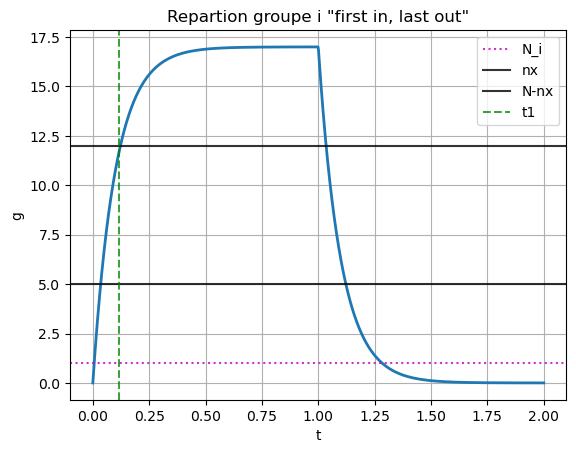

In [158]:
pas = 0.01

def cycle_de_vie(t, tau_glob, a, b, K_1, K_2):
    tau_1 = a * tau_glob
    tau_2 = b * tau_glob
    
    if t < 0:
        return 0
    elif 0 <= t < tau_glob:
        return (K_1 - K_2) * np.exp(-t / (tau_1 + 0.00001)) + K_2
    else:
        return ((K_1 - K_2) * np.exp(-tau_glob / (tau_1+0.000001)) + K_2) * np.exp(-(t - tau_glob) / (tau_2+0.000001))

# Définir les paramètres
tau_pop_glob = 1.0
K_1_n = 0
K_2_n = 17
a_n = 0.1
b_n = 0.1
nx= 12
FIFO = True

import numpy as np
from scipy.optimize import bisect

# Définir la fonction que nous voulons résoudre
def g_1(t):
    return cycle_de_vie(t, tau_glob, a_n, b_n, K_1_n, K_2_n) - nx

def g_2(t):
    return cycle_de_vie(t, tau_glob, a_n, b_n, K_1_n, K_2_n) - (K_2_n-nx)


try:
    t_solution_1 = bisect(g_1, 0, tau_pop_glob, xtol=pas, maxiter=50)
    bool_1 = True
except (ValueError, RuntimeError):
    t_solution_1 = horizon
    bool_1 = False
if FIFO:
    try:
        t_solution_2 = bisect(g_2, tau_glob, tau_glob * (1 + 5*b_n))
        bool_2 = True
    except (ValueError, RuntimeError):
        t_solution_2 = False
        bool_2 = False
else:
    try:
        t_solution_2 = bisect(g_1, tau_pop_glob, tau_pop_glob * (1 + 5*b_n), xtol=pas, maxiter=50)
        bool_2 = True
    except (ValueError, RuntimeError):
        t_solution_2 = False
        bool_2 = False        

condition_1 = t_solution_1 < 0.7 < t_solution_2 and bool_1 is True and bool_2 is True
condition_2 = t_solution_1 < 0.7 and bool_2 is False

# Créer un tableau de valeurs t
t = np.linspace(0, 2 * tau_glob, 1000)

# Calculer la fonction en fonction de t
y = np.vectorize(cycle_de_vie)(t, tau_glob, a_n, b_n, K_1_n, K_2_n)

# Tracer la fonction avec une ligne plus épaisse
plt.plot(t, y, linewidth=2.0)

plt.xlabel('t')
plt.ylabel('g')
plt.title('Repartion groupe i "first in, last out"')

# Ajouter des lignes en pointillé plus transparentes pour tau_1, K_1, tau_2, K_2
# plt.axvline(x=3*a * tau_glob, color='r', linestyle=':', label=f'tau_1', alpha=0.8)
# plt.axvline(x=tau_glob, color='g', linestyle=':', label=f'tau_global', alpha=0.8)
# plt.axvline(x=3*b*tau_glob + tau_glob , color='c', linestyle=':', label=f'tau_2', alpha=0.8)
#plt.axhline(y=K_1, color='b', linestyle='--', label=f'K_1 = {K_1}', alpha=0.5)
plt.axhline(y=K_2, color='m', linestyle=':', label=f'N_i', alpha=0.8)
plt.axhline(y=nx, color='k', linestyle='-', label=f'nx', alpha=0.8)
plt.axhline(y=K_2_n-nx, color='k', linestyle='-', label=f'N-nx', alpha=0.8)
#plt.axhline(y=K_2 - 0.3, color='k', linestyle='-', label=f'N_i - nx', alpha=0.8)
if condition_1 or condition_2:
    plt.axvline(x=t_solution_1, color='g', linestyle='--', label=f't1', alpha=0.75)
   # plt.axvline(x=t_solution_2, color='r', linestyle='--', label=f't2', alpha=0.75)

plt.legend()
plt.grid(True)
plt.show()

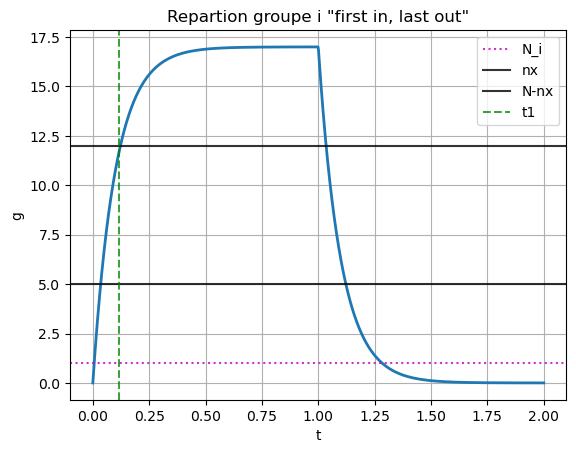

In [148]:
pas = 0.01

def cycle_de_vie(t, tau_glob, a, b, K_1, K_2):
    tau_1 = a * tau_glob
    tau_2 = b * tau_glob
    
    if t < 0:
        return 0
    elif 0 <= t < tau_glob:
        return (K_1 - K_2) * np.exp(-t / (tau_1 + 0.00001)) + K_2
    else:
        return ((K_1 - K_2) * np.exp(-tau_glob / (tau_1+0.000001)) + K_2) * np.exp(-(t - tau_glob) / (tau_2+0.000001))

# Définir les paramètres
tau_pop_glob = 1.0
K_1_n = 0
K_2_n = 17
a_n = 0.1
b_n = 0.1
n = 12
FIFO = True

import numpy as np
from scipy.optimize import bisect

# Définir la fonction que nous voulons résoudre
def g_1(t):
    return cycle_de_vie(t, tau_glob, a_n, b_n, K_1_n, K_2_n) - n

def g_2(t):
    return cycle_de_vie(t, tau_glob, a_n, b_n, K_1_n, K_2_n) - (K_2_n-n)


try:
    t_solution_1 = bisect(g_1, 0, tau_pop_glob, xtol=pas, maxiter=50)
    bool_1 = True
except (ValueError, RuntimeError):
    t_solution_1 = horizon
    bool_1 = False
if FIFO:
    try:
        t_solution_2 = bisect(g_2, tau_glob, tau_glob * (1 + 5*b_n))
        bool_2 = True
    except (ValueError, RuntimeError):
        t_solution_2 = False
        bool_2 = False
else:
    try:
        t_solution_2 = bisect(g_1, tau_pop_glob, tau_pop_glob * (1 + 5*b_n), xtol=pas, maxiter=50)
        bool_2 = True
    except (ValueError, RuntimeError):
        t_solution_2 = False
        bool_2 = False        

condition_1 = t_solution_1 < 0.7 < t_solution_2 and bool_1 is True and bool_2 is True
condition_2 = t_solution_1 < 0.7 and bool_2 is False

# Créer un tableau de valeurs t
t = np.linspace(0, 2 * tau_glob, 1000)

# Calculer la fonction en fonction de t
y = np.vectorize(cycle_de_vie)(t, tau_glob, a_n, b_n, K_1_n, K_2_n)

# Tracer la fonction avec une ligne plus épaisse
plt.plot(t, y, linewidth=2.0)

plt.xlabel('t')
plt.ylabel('g')
plt.title('Repartion groupe i "first in, last out"')

# Ajouter des lignes en pointillé plus transparentes pour tau_1, K_1, tau_2, K_2
# plt.axvline(x=3*a * tau_glob, color='r', linestyle=':', label=f'tau_1', alpha=0.8)
# plt.axvline(x=tau_glob, color='g', linestyle=':', label=f'tau_global', alpha=0.8)
# plt.axvline(x=3*b*tau_glob + tau_glob , color='c', linestyle=':', label=f'tau_2', alpha=0.8)
#plt.axhline(y=K_1, color='b', linestyle='--', label=f'K_1 = {K_1}', alpha=0.5)
plt.axhline(y=K_2, color='m', linestyle=':', label=f'N_i', alpha=0.8)
plt.axhline(y=n, color='k', linestyle='-', label=f'nx', alpha=0.8)
plt.axhline(y=K_2_n-n, color='k', linestyle='-', label=f'N-nx', alpha=0.8)
#plt.axhline(y=K_2 - 0.3, color='k', linestyle='-', label=f'N_i - nx', alpha=0.8)
if condition_1 or condition_2:
    plt.axvline(x=t_solution_1, color='g', linestyle='--', label=f't1', alpha=0.75)
   # plt.axvline(x=t_solution_2, color='r', linestyle='--', label=f't2', alpha=0.75)

plt.legend()
plt.grid(True)
plt.show()

In [108]:
t_solution_2

1.2140020762544736

In [288]:
Trans = [-53., -68., -84., -81., -98., -94., -94., -53., -86., -90., -64., -64., -82., -53.]
import numpy as np
from scipy.integrate import odeint

def cycle_de_vie(t, K_1, K_2, tau_glob, a, b):
    tau_1 = a * tau_glob
    tau_2 = b * tau_glob
    
    if t < 0:
        return 0
    elif 0 <= t < tau_glob:
        return (K_1 - K_2) * np.exp(-t / (tau_1 + 0.00001)) + K_2
    else:
        return ((K_1 - K_2) * np.exp(-tau_glob / (tau_1+0.000001)) + K_2) * np.exp(-(t - tau_glob) / (tau_2+0.000001))

def nb_gp():
    return len(list(input_A.keys()))

def N_pop():
    n = 1
    N = 0
    nb = nb_gp()
    N_list = np.zeros(nb+1)
    while n<nb+1:
        N+=input_A[n][-1][2]
        N_list[n] = N
        n+=1
    return N_list


def n_glob():
    N_list = N_pop()
    return N_list[-1]


def Kt():
# Fonction de régression de kt
    df = df_ts.copy()
    df['input'] = Trans
    return sum(df['input']*df['Coef reg kt non normalisé'])


def kt_1():
#Modèle logarithmique, faible concavité
    arg_1 = (np.exp(1)-1)/wt
    arg_2 = np.exp(1)
    return np.log(arg_1*Kt()+arg_2)

def kt_2():
#Modèle exponentielle décroissante, concavité plus forte
    arg = -3*(Kt()+wt)/(wt)
    return 1 - np.exp(arg)

def Ks():
#Fonction de régression de p_s
    df = df_ts.copy()
    df['input'] = Trans
    final = 0.004 * sum(df['input']*df['Coef reg ps non normalisé'])
    return final

def ps(beta=0.05):
#Regression logistique asymétrique pour la probabilité de succès
    arg = np.exp(-Ks())
    return 1/(1+beta*arg)

def groupe(n):
    N_list = N_pop()                                #Liste [0, N_1,...] contenant le nombre de personnes dans chaque groupe
    gp = 1 + indice_max_inferieur(n,N_list[:1])     #Groupe auquel appartient l'individu n
    return gp

def max_temps_param():
    nb_groupes = nb_gp()
    L_temps = np.zeros(nb_groupes)
    for k in range(nb_groupes):
        tau_glob = input_A[k+1][-1][2]
        b = input_A[k+1][-1][4]
        L_temps[k] = tau_glob*(1+5*b)
    return max(L_temps)

def solution(n):
    gp = groupe(n)
    L_var = input_A[gp]                              #Liste pour chaque variable [var, K_2, tau_glob, a, b, bool] avec le bool FIFO=1, FILO=0                              #nombre total de personnes au total
    tau_pop_glob = L_var[-1][2]                     #Temps d'horizon pour le groupe de n 
    K_2_n = L_var[-1][1]
    a_n = L_var[-1][3]
    b_n = L_var[-1][4]
    FIFO = L_var[-1][5]
# Définir la fonction que nous voulons résoudre
    def g_1(t):
        return cycle_de_vie(t,  K_1_n, K_2_n, tau_glob, a_n, b_n) - n

    def g_2(t):
        return cycle_de_vie(t, K_1_n, K_2_n, tau_glob, a_n, b_n) - (K_2_n-n)


    try:
        t_solution_1 = bisect(g_1, 0, tau_pop_glob, xtol=0.01, maxiter=50)
        bool_1 = True
    except (ValueError, RuntimeError):
        t_solution_1 = horizon
        bool_1 = False
    if FIFO:
        try:
            t_solution_2 = bisect(g_2, tau_glob, tau_glob * (1 + 5*b_n), xtol=0.01, maxiter=50)
            bool_2 = True
        except (ValueError, RuntimeError):
            t_solution_2 = False
            bool_2 = False
    else:
        try:
            t_solution_2 = bisect(g_1, tau_pop_glob, tau_pop_glob * (1 + 5*b_n), xtol=0.01, maxiter=50)
            bool_2 = True
        except (ValueError, RuntimeError):
            t_solution_2 = False
            bool_2 = False        

    return t_solution_1, t_solution_2

def solutions_t1_t2():
    N_tot = n_glob()
    return np.array([solution(n) for n in range(N_tot)])

def f_WB(n, t, Solution):
    gp = groupe(n)
    k = kt_2()
    p = ps()
    fac = (1/(1+delta))**(t*0.5)                    #Bien dire c'est quoi le pas
    L_var = input_A[gp]                              #Liste pour chaque variable [var, K_2, tau_glob, a, b, bool] avec le bool FIFO=1, FILO=0                              #nombre total de personnes au total
    t_solution_1, t_solution_2 = Solution[n-1]
    condition_1 = t_solution_1 < t < t_solution_2 and bool_1 is True and bool_2 is True
    condition_2 = t_solution_1 < t and bool_2 is False
    if condition_1 or condition_2:
        WB = 0
        for k in range(len(L_var)-1):
            tau_par = L_var[k][3]              #[par,K_1,K_2,tau_glob,a,b]
            K_1 = L_var[k][1]
            K_2 = L_var[k][2]
            a = L_var[k][4]
            b = L_var[k][5]
            delta_A = cycle_de_vie(t-t_solution_1, K_1, K_2, tau_par, a, b)
            if delta_A>0:
                delta_X = k*delta_A
            else:
                delta_X = (2-k)*delta_A
            WB += dic_wb[L_var[k][0]]*delta_X
        WB = p*fac*WB
    else:
        WB = 0
        # # Créer un tableau de valeurs t
        # t = np.linspace(0, 2 * tau_glob, 1000)

        # # Calculer la fonction en fonction de t
        # y = np.vectorize(cycle_de_vie)(t, K_1_n, K_2_n, tau_glob, a_n, b_n)

        # # Tracer la fonction avec une ligne plus épaisse
        # plt.plot(t, y, linewidth=2.0)

        # plt.xlabel('t')
        # plt.ylabel('g')
        # plt.title('Repartion groupe i "first in, last out"')

        # # Ajouter des lignes en pointillé plus transparentes pour tau_1, K_1, tau_2, K_2
        # # plt.axvline(x=3*a * tau_glob, color='r', linestyle=':', label=f'tau_1', alpha=0.8)
        # # plt.axvline(x=tau_glob, color='g', linestyle=':', label=f'tau_global', alpha=0.8)
        # # plt.axvline(x=3*b*tau_glob + tau_glob , color='c', linestyle=':', label=f'tau_2', alpha=0.8)
        # #plt.axhline(y=K_1, color='b', linestyle='--', label=f'K_1 = {K_1}', alpha=0.5)
        # plt.axhline(y=K_2_n, color='m', linestyle=':', label=f'N_i', alpha=0.8)
        # plt.axhline(y=n, color='k', linestyle='-', label=f'nx', alpha=0.8)
        # plt.axhline(y=K_2_n-n, color='k', linestyle='-', label=f'N-nx', alpha=0.8)
        # #plt.axhline(y=K_2 - 0.3, color='k', linestyle='-', label=f'N_i - nx', alpha=0.8)
        # if condition_1 or condition_2:
        #     plt.axvline(x=t_solution_1, color='g', linestyle='--', label=f't1', alpha=0.75)
        # # plt.axvline(x=t_solution_2, color='r', linestyle='--', label=f't2', alpha=0.75)

        # plt.legend()
        # plt.grid(True)
        # plt.show() 
    return WB

pas = 1/12

def fonction_impact_gp(n, Solution):
    # Calcule le WB sommé sur le temps pour un individu n
    temps_int = max_temps_param()
    N_fen = int(temps_int/pas)
    T = np.linspace(0,temps_int, N_fen)
    return np.sum(np.vectorize(f_WB)(n,T))*pas

def fonction_impact_temps(t, Solution):
    N_tot = n_glob()
    N_indiv = np.linspace(1,N_tot, dtype=int)
    return np.sum(np.vectorize(f_WB)(N_indiv,t))

def impact_tot(Solution):
    N_tot = n_glob()
    N_indiv = np.linspace(1,N_tot, dtype=int)
    return np.sum(np.vectorize(fonction_impact_gp)(N_indiv))


In [285]:
Solution = 
impact_tot()

216.66666666666666

In [289]:
f_WB(12,1)

5.961624472315735

In [274]:
fonction_impact_gp(12)

0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125
0.1953125


4.333333333333333

In [125]:
def indice_max_inferieur(n, L):
    gauche, droite = 0, len(L) - 1
    indice = 0
    while gauche <= droite:
        milieu = (gauche + droite) // 2

        if L[milieu] < n:
            indice = milieu
            gauche = milieu + 1
        else:
            droite = milieu - 1

    return indice

indice_max_inferieur(19,[18,35])

0

In [128]:
N_list = N_pop()
gp = 1 + indice_max_inferieur(n,N_list[1:])
L_var = input_A[gp]
n_tot = N_list[-1]
tau_1 = L_var[-1][1]
K = L_var[-1][2]
tau_2 = L_var[-1][3]
k = kt_2()
p = ps()
fac = (1/(1+delta))**(t*0.5)

def g(n, t): #Fonction de la taille du groupe liée à l'individu n, à l'instant t
    gp = 1 + indice_max_inferieur(n,N_list[1:])
    return modele_cycle_de_vie(t, tau_1, K, tau_2), gp

def T(n): #Fonction: premier t tel l'individu n est touché
    rge_n = N_list[gp-1:gp+1]
    n_gp = rge_n[1] - rge_n[0]
    def equation_a_resoudre(u):
        return g(n,u) - n

g(10,1)

(17, 1)

In [ ]:
B_input = {1: [('No_Criminality/Insecurity', 0.0, 1.0), ('No_Discrimination', 0.0, 1.0), ('Social coherence (cohésion sociale)', 0.0, 1.0), ('Traditionalism', 0.0, 1.0), ('Years in state', 0.0, 1.0), ('Academic education', 0.0, 1.0), ('Family education', 0.0, 1.0), ('Access to local services', 0.0, 1.0), ('Air and water pollution', 0.0, 1.0), ('Close to green spaces', 0.5, 1.0), ('Housing quality', 0.0, 1.0), ('No_No accès to health services', 0.0, 1.0), ('No_No access to food', 0.0, 1.0), ('No_No access to water', 0.0, 1.0), ('Noise pollution', 0.0, 1.0), ('Richessness fauna, flaura and landscape', 0.0, 1.0), ('Relative health', 0.0, 1.0), ('Relative salary', 0.0, 1.0), ('Family support', 0.0, 1.0), ('No_Famlily strain', 0.0, 1.0), ('Friends support', 0.0, 1.0), ('Having grandparents', 0.0, 1.0), ('Number of children', 0.0, 1.0), ('Partenaired', 0.0, 1.0), ('Positive relationships', 0.0, 1.0), ('Pregnancy', 0.0, 1.0), ('Social Closeness', 0.0, 1.0), ('Social integration', 0.0, 1.0), ('No_Tobacco and alcohol of others', 0.0, 1.0), ('No_Contribution to others', 0.0, 1.0), ('Emotional management', 0.0, 1.0), ('Managing impact of past experience', 0.0, 1.0), ('Positive habits', 0.5, 1.0), ('Stress management', 0.5, 1.0), ('Coping active (proactivity)', 0.0, 1.0), ('Efforts in life', 0.0, 1.0), ('No_Hypervigilence (=somatic amplification)', 0.0, 1.0), ('Selective secondary control(=commitment)', 0.0, 1.0), ('Compensatory primary control', 0.0, 1.0), ('Openness to new experiences', 2.0, 1.0), ('Evenement mastery', 0.5, 1.0), ('Goals in life', 0.0, 1.0), ('Self -control', 0.5, 1.0), ('Time management and anticipation', 0.3, 1.0), ('(Need of Security)', 0.0, 1.0), ('Altruism', 0.0, 1.0), ('Gratitude', 0.0, 1.0), ('Honesty', 0.0, 1.0), ('No_Agreebleness', 0.0, 1.0), ('Extraversion', 0.0, 1.0), ('No_Health locus of control', 0.0, 1.0), ('Optimism', 0.0, 1.0), ('No_Social potency', 0.0, 1.0), ('No_Sympathy', 0.0, 1.0), ('Consciensciousness', 0.0, 1.0), ('Living the moment', 0.2, 1.0), ('Physical attractiveness', 0.5, 1.0), ('Self protection', 0.0, 1.0), ('Self-efficacy', 1.0, 1.0), ('No_Alcohol problems', 0.0, 1.0), ('No_Drug consumption', 0.0, 1.0), ('Food', 0.0, 1.0), ('Social networks', 0.0, 1.0), ('No_Tobacco', 0.0, 1.0), ('No_Mental health professsionnal', 0.0, 1.0), ('No_Aches', -0.5, 1.0), ('Diseases', 0.0, 1.0), ('No_Sleep problems', 0.0, 1.0), ('Games', 0.0, 1.0), ('Intellectual activities', 0.0, 1.0), ('Physical activity', 1.0, 1.0), ('Political participation', 0.0, 1.0), ('Sex life', 0.0, 1.0), ('Spiritual and religious experiences', 0.0, 1.0), ('Assessment financial situation', 0.0, 1.0), ('Assessment professionnal life', 0.0, 1.0), ('Balance btw personal and professional life', 0.3, 1.0), ('Control over professionnal life', 0.0, 1.0), ('Financial situation effort', 0.0, 1.0), ('taille', 30, 1.0)], 2: [('No_Criminality/Insecurity', 0.0, 1.0), ('No_Discrimination', 0.0, 1.0), ('Social coherence (cohésion sociale)', 0.0, 1.0), ('Traditionalism', 0.0, 1.0), ('Years in state', 0.0, 1.0), ('Academic education', 0.0, 1.0), ('Family education', 0.0, 1.0), ('Access to local services', 0.0, 1.0), ('Air and water pollution', 0.0, 1.0), ('Close to green spaces', 2.0, 1.0), ('Housing quality', 0.0, 1.0), ('No_No accès to health services', 0.0, 1.0), ('No_No access to food', 0.0, 1.0), ('No_No access to water', 0.0, 1.0), ('Noise pollution', 0.0, 1.0), ('Richessness fauna, flaura and landscape', 0.0, 1.0), ('Relative health', 0.0, 1.0), ('Relative salary', 0.0, 1.0), ('Family support', 0.0, 1.0), ('No_Famlily strain', 0.0, 1.0), ('Friends support', 0.0, 1.0), ('Having grandparents', 0.0, 1.0), ('Number of children', 0.0, 1.0), ('Partenaired', 0.0, 1.0), ('Positive relationships', 0.0, 1.0), ('Pregnancy', 0.0, 1.0), ('Social Closeness', 0.0, 1.0), ('Social integration', 0.0, 1.0), ('No_Tobacco and alcohol of others', 0.0, 1.0), ('No_Contribution to others', 0.0, 1.0), ('Emotional management', 0.0, 1.0), ('Managing impact of past experience', 0.0, 1.0), ('Positive habits', 2.0, 1.0), ('Stress management', 2.0, 1.0), ('Coping active (proactivity)', 0.0, 1.0), ('Efforts in life', 0.0, 1.0), ('No_Hypervigilence (=somatic amplification)', 0.0, 1.0), ('Selective secondary control(=commitment)', 0.0, 1.0), ('Compensatory primary control', 0.0, 1.0), ('Openness to new experiences', 2.0, 1.0), ('Evenement mastery', 1.0, 1.0), ('Goals in life', 0.0, 1.0), ('Self -control', 1.0, 1.0), ('Time management and anticipation', 1.0, 1.0), ('(Need of Security)', 0.0, 1.0), ('Altruism', 0.0, 1.0), ('Gratitude', 0.0, 1.0), ('Honesty', 0.0, 1.0), ('No_Agreebleness', 0.0, 1.0), ('Extraversion', 0.0, 1.0), ('No_Health locus of control', 0.0, 1.0), ('Optimism', 0.0, 1.0), ('No_Social potency', 0.0, 1.0), ('No_Sympathy', 0.0, 1.0), ('Consciensciousness', 0.0, 1.0), ('Living the moment', 0.8, 1.0), ('Physical attractiveness', 2.0, 1.0), ('Self protection', 0.0, 1.0), ('Self-efficacy', 1.0, 1.0), ('No_Alcohol problems', 0.0, 1.0), ('No_Drug consumption', 0.0, 1.0), ('Food', 0.0, 1.0), ('Social networks', 0.0, 1.0), ('No_Tobacco', 0.5, 1.0), ('No_Mental health professsionnal', 0.0, 1.0), ('No_Aches', 1.0, 1.0), ('Diseases', 0.0, 1.0), ('No_Sleep problems', 0.0, 1.0), ('Games', 0.0, 1.0), ('Intellectual activities', 0.0, 1.0), ('Physical activity', 3.0, 1.0), ('Political participation', 0.0, 1.0), ('Sex life', 0.0, 1.0), ('Spiritual and religious experiences', 0.0, 1.0), ('Assessment financial situation', 0.0, 1.0), ('Assessment professionnal life', 0.0, 1.0), ('Balance btw personal and professional life', 1.0, 1.0), ('Control over professionnal life', 0.0, 1.0), ('Financial situation effort', 0.0, 1.0), ('taille', 10000, 1.0)]}